# **Medición de tiempos por bloques**

El presente notebook tiene como objetivo realizar mediciones de los tiempos de ejecución de la función **eliminacion_bloques** considerando distintos tamaños de bloques cuadrados para una matriz de 10^2x10^2. Adicionalmente se incluirán los errores relativos.

Las dimensiones de los bloques que utilizaremos son: 20x20, 40x40, 60x60 y 80x80.

Referente a los errores relativos, compararemos los resultados obtenidos con la solución de numpy.

**Cargar librerías**

In [1]:
import os
import numpy as np
import pprint
import copy
from math import sqrt
from scipy.linalg import solve_triangular

import time
import pandas as pd
import matplotlib.pyplot as plt

**Cargar las funciones**

In [2]:
%run -i funciones_factorizacion_QR.py

**Funcion para calcular el error relativo**

In [3]:
def err_relativo(aprox, obj):
    vector = np.abs(aprox-obj)/np.abs(obj)
    prom = np.sum(vector)/len(vector)
    return prom

**Crear tabla para reportar tiempo y errores**

In [4]:
col_names = ['Dimensiones de la matriz','Tiempo','Promedio error relativo']
table_df = pd.DataFrame(columns = col_names)

## Eliminación por bloques con QR considerando sistemas con única solución

### Matriz 10^2 x 10^2

Generaremos un sistema de ecuaciones lineales de 10^2 x 10^2

Fijamos una semilla para que el ejemplo sea replicable

In [5]:
np.random.seed(2020)

In [6]:
m = 100
n = 100
A = crear_matriz_aleatoria(m, n, 5, -5,True)

# sumamos las entradas de las filas para crear el vector b, así nuestro vector x tendrá por solución el valor de 1 en cada entrada.
b = np.sum(A, axis=1)

print("A:")
pprint.pprint(A)
print("b:")
pprint.pprint(b)

A:
array([[ 5.,  4.,  0., ..., -1., -4.,  0.],
       [-3.,  5., -2., ...,  3., -3., -1.],
       [-4., -5., -3., ..., -1., -5.,  3.],
       ...,
       [-1., -5., -5., ..., -1., -5., -2.],
       [-2.,  1., -3., ...,  5.,  4.,  3.],
       [ 3.,  4.,  1., ..., -1.,  3.,  5.]])
b:
array([  7.,   3., -37., -19., -21.,  33., -21.,  -4., -36.,   4.,  13.,
       -74.,  -4., -31.,  21.,   7.,  13.,  -6.,  13.,  10., -58.,  17.,
       -50.,  25., -19.,  15., -35.,   4.,  -2.,   6., -26., -15., -65.,
       -17.,  75., -22.,  22., -30.,  39.,  39., -67.,  24., -51.,  29.,
        -3., -24.,   1.,   8.,  34.,  19.,  13.,  24.,  27., -12.,   9.,
       -17., -15., -19.,  25., -31.,  24.,  34.,  19., -25., -42., -13.,
       -31., -56., -33.,  11., -19., -48.,  80., -11., -11.,   7., -22.,
         2.,  41., -18., -32.,  79., -16.,  29., -36., -31., -15.,  31.,
       -31.,  -7.,  34.,  20., -11.,  -2., -16., -10., -47., -28., -78.,
        11.])


## Bloques de 20x20

**solución del sistema usando la función implementada**

In [7]:
begin = time.time()
approx = eliminacion_bloques(A,b,20,20)
end = time.time()

**Solución del sistema usando Numpy**

In [8]:
obj = np.linalg.solve(A,b)

**Error relativo**

In [9]:
error_relativo = err_relativo(approx,obj)

**Agregar resultados a la tabla**

In [10]:
table_df.loc[len(table_df)] = ['20x20',end-begin,error_relativo]

## Bloques de 40x40

**solución del sistema usando la función implementada**

In [11]:
begin = time.time()
approx = eliminacion_bloques(A,b,40,40)
end = time.time()

**Error relativo**

In [12]:
error_relativo = err_relativo(approx,obj)

**Agregar resultados a la tabla**

In [13]:
table_df.loc[len(table_df)] = ['40x40',end-begin,error_relativo]

## Bloques de 60x60

**solución del sistema usando la función implementada**

In [14]:
begin = time.time()
approx = eliminacion_bloques(A,b,60,60)
end = time.time()

**Solución del sistema usando Numpy**

In [15]:
obj = np.linalg.solve(A,b)

**Error relativo**

In [16]:
error_relativo = err_relativo(approx,obj)

**Agregar resultados a la tabla**

In [17]:
table_df.loc[len(table_df)] = ['60x60',end-begin,error_relativo]

## Bloques de 80x80

**solución del sistema usando la función implementada**

In [18]:
begin = time.time()
approx = eliminacion_bloques(A,b,80,80)
end = time.time()

**Solución del sistema usando Numpy**

In [19]:
obj = np.linalg.solve(A,b)

**Error relativo**

In [20]:
error_relativo = err_relativo(approx,obj)

**Agregar resultados a la tabla**

In [21]:
table_df.loc[len(table_df)] = ['80x80',end-begin,error_relativo]

### Mostrar tabla con los resultados

A continuación se muestra la tabla con los resultados obtenidos

In [22]:
table_df.head()

,Dimensiones de la matriz,Tiempo,Promedio error relativo
0,20x20,0.190501,4.737843e-13
1,40x40,0.306489,2.871103e-13
2,60x60,0.341341,3.542444e-13
3,80x80,0.287789,2.223222e-14


## Gráficas

### Gráfica del tiempo de ejecución

In [23]:
dimensiones = table_df['Dimensiones de la matriz']
tiempos = table_df['Tiempo']

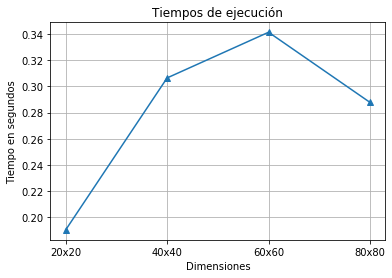

In [24]:
plt.plot(dimensiones, tiempos, '^-')
plt.xlabel('Dimensiones')
plt.ylabel('Tiempo en segundos')
plt.grid(True)
plt.title('Tiempos de ejecución')
plt.show()

plt.plot(dimensiones, tiempos, '^-')
plt.xlabel('Dimensiones')
plt.ylabel('Tiempo en segundos')
plt.grid(True)
plt.title('Tiempos de ejecución')
plt.show()

### Gráfica del promedio del error relativo

In [25]:
dimensiones = table_df['Dimensiones de la matriz']
error = table_df['Promedio error relativo']

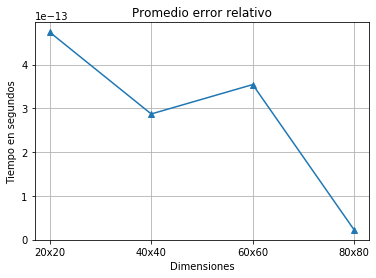

In [26]:
plt.plot(dimensiones, error, '^-')
plt.xlabel('Dimensiones')
plt.ylabel('Tiempo en segundos')
plt.grid(True)
plt.title('Promedio error relativo')
plt.show()

## Summary de los Reultados

Observamos que el menor tiempo de ejecución se presenta cuando elegimos bloques más pequeño, mientras que el menor error relativo es cuando elegimos bloques de mayor tamaño